In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import PyComplexHeatmap as pch
import numpy as np
from amb import *

In [3]:
ct = 'Astro-TE_NN'

In [4]:
hypo_df = pd.read_csv(f'mC_FILTER_DMR_BED/{ct}.Hypo.aDMR.bed', sep = '\t', header= None)
hyper_df = pd.read_csv(f'mC_FILTER_DMR_BED/{ct}.Hyper.aDMR.bed', sep = '\t', header= None)

In [5]:
hypo_length = hypo_df.shape[0]
hyper_length = hyper_df.shape[0]
hypo_length, hyper_length

(905, 2314)

In [6]:
dmr_df = pd.concat([hyper_df,hypo_df])
dmr_df.columns = ['chrom','start','end','dmr_id','8wk','9mo','18mo']
df_heatmap = dmr_df.set_index('dmr_id')[['8wk','9mo','18mo']]
df_heatmap.columns = [f'{ct}.8wk',f'{ct}.9mo',f'{ct}.18mo']

In [11]:
col_annot = pd.DataFrame(['8wk','9mo','18mo'], columns=['Age'])
col_annot.index = df_heatmap.columns
col_annot.head()

,Age
Astro-TE_NN.8wk,8wk
Astro-TE_NN.9mo,9mo
Astro-TE_NN.18mo,18mo


In [10]:
row_annot = pd.DataFrame( ['Aging_Hyper'] * int(hyper_length)+ ['Aging_Hypo'] * int(hypo_length), columns=['Aging_Trend'])
row_annot.index = df_heatmap.index
row_annot.head()

,Aging_Trend
dmr_id,
chr1-7027731-7027737,Aging_Hyper
chr1-8778571-8779531,Aging_Hyper
chr1-8939181-8939279,Aging_Hyper
chr1-10507677-10508586,Aging_Hyper
chr1-12754494-12754572,Aging_Hyper


In [53]:
age_pelatte = get_age_palette()
age_pelatte['8wk'] = age_pelatte['2mo']
age_pelatte = {'9mo': '#e23c5d', '18mo': '#ffb42c', '8wk': '#480080'}

In [54]:
trend_palette = {'Aging_Hypo':'cornflowerblue','Aging_Hyper':'lightcoral'}

Starting plotting HeatmapAnnotations
Starting plotting HeatmapAnnotations


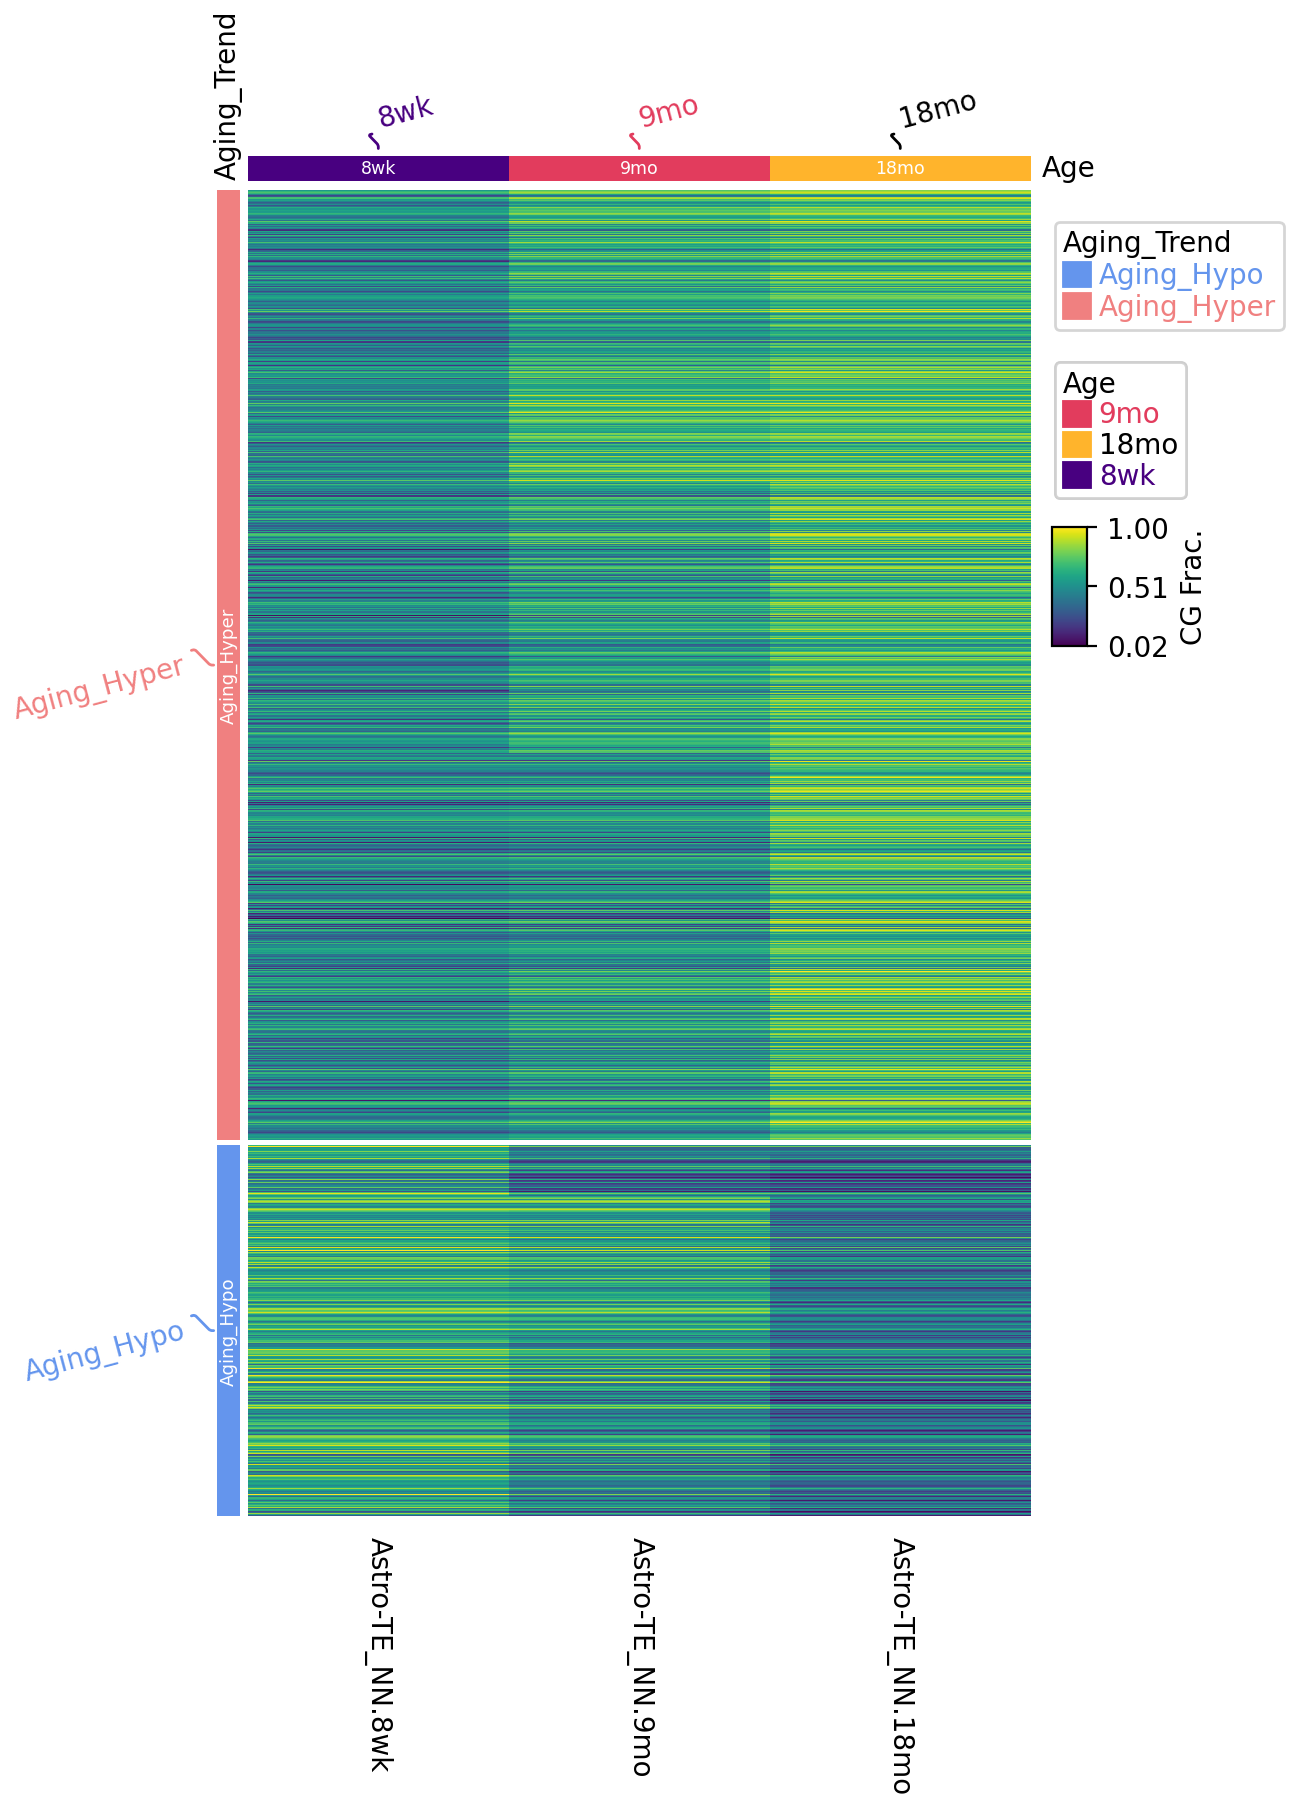

In [55]:
col_ha = pch.HeatmapAnnotation(label=pch.anno_label(col_annot.Age, merge=True,rotation=15, colors = age_pelatte ),
                            Age=pch.anno_simple(col_annot.Age,add_text=True,legend=True, colors = age_pelatte ), axis=1,
                           legend=True,legend_gap=5,hgap=0.5)

row_ha = pch.HeatmapAnnotation(label=pch.anno_label(row_annot.Aging_Trend, merge=True,rotation=15, colors = trend_palette),
                            Aging_Trend=pch.anno_simple(row_annot.Aging_Trend,add_text=True,legend=True, colors = trend_palette), axis=0,
                           legend=True,legend_gap=5,hgap=0.5)


plt.figure(figsize=(5.5, 8), dpi = 200)
cm = pch.ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,
                       left_annotation=row_ha,
                       row_cluster=True,col_cluster = False,
                       row_split=row_annot.Aging_Trend,
                       row_split_gap=0.5,
                       label='CG Frac.',rasterized=True,
                       show_rownames=False,show_colnames=True,
                       tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
                       cmap='viridis',xticklabels_kws={'labelrotation':-90,'labelcolor':'black'})
plt.savefig(f"figure/{ct}.aDMR.heatmap.pdf", bbox_inches='tight')
plt.show()